In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


**Import all the necessary packages**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt# plotting
import os # accessing directory structure


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor,     GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

**Load the csv file**

In [3]:
crop_filepath = "../input/crop-recommendation-dataset/Crop_recommendation.csv"
data = pd.read_csv(crop_filepath)

In [4]:
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

**VISUALIZATION OF THE DATASET**

<AxesSubplot:title={'center':'Correlation between features'}>

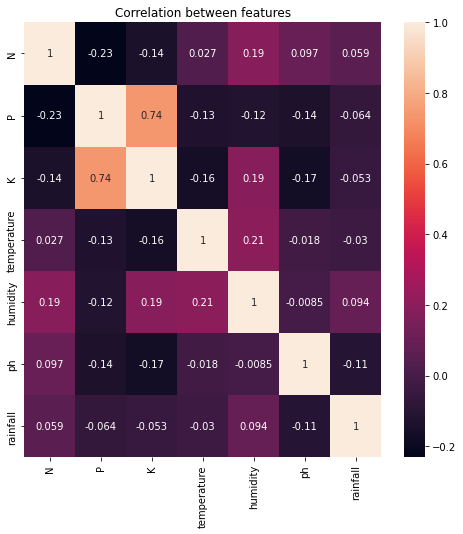

In [10]:
# FINDING THE CORRELATION BETWEEN THE FEATURES
plt.figure(figsize=(8,8))
plt.title("Correlation between features")
corr = data.corr()
sns.heatmap(corr, annot=True)

Text(0, 0.5, 'crops')

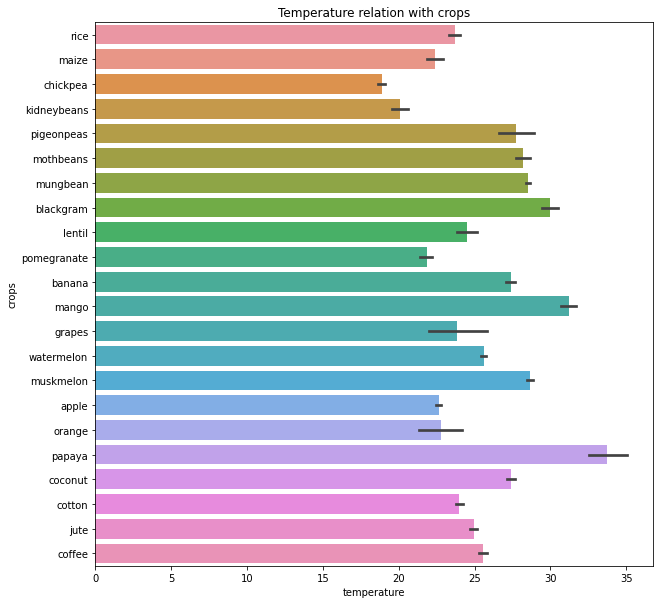

In [11]:
#VISUALIZING TEMPERATURE RELATION WITH CROPS USING BARPLOT
plt.figure(figsize=(10,10))
plt.title("Temperature relation with crops")
sns.barplot(y="label", x="temperature", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

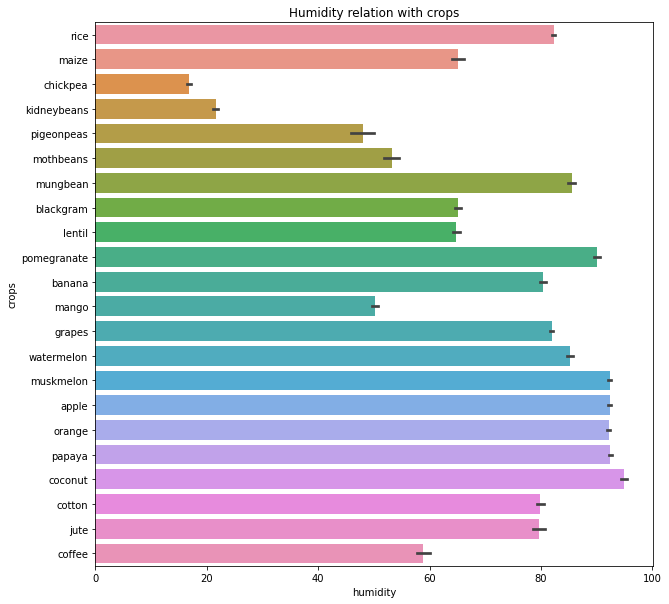

In [12]:
# VISUALIZING THE RELATION BETWEEN HUMIDITY AND CROPS USING BARPLOT
plt.figure(figsize=(10,10))
plt.title("Humidity relation with crops")
sns.barplot(y="label", x="humidity", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

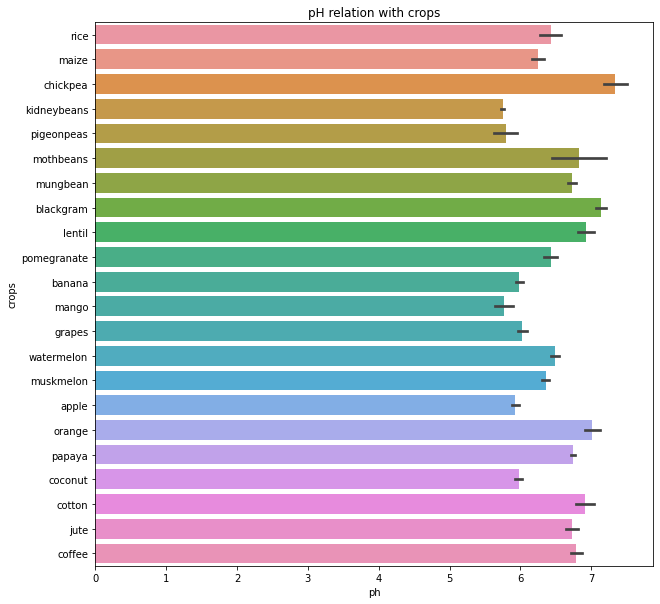

In [13]:
#VISUALIZING THE RELATION BETWEEN THE pH LEVEL IN SOIL AND CROPS USING BARPLOT
plt.figure(figsize=(10,10))
plt.title("pH relation with crops")
sns.barplot(y="label", x="ph", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

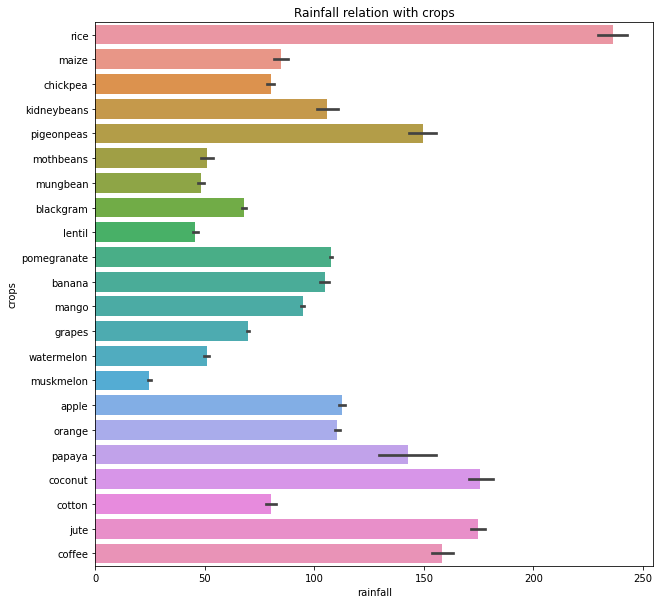

In [14]:
#VISUALIZING THE REPLATION BETWEEN RAINFALL AND CROPS USING BARPLOT
plt.figure(figsize=(10,10))
plt.title("Rainfall relation with crops")
sns.barplot(y="label", x="rainfall", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

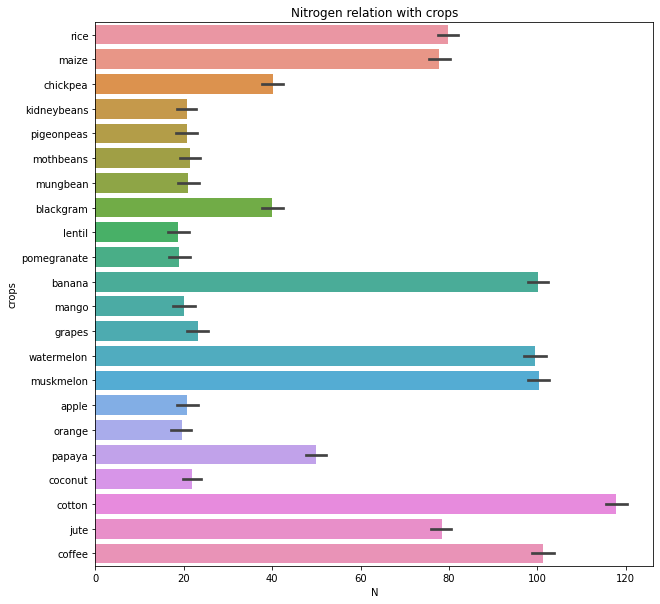

In [15]:
#VISUALIZING THE RELATION BETWEEN THE NITROGEN LEVEL IN SOIL AND CROPS USING BARPLOT
plt.figure(figsize=(10,10))
plt.title("Nitrogen relation with crops")
sns.barplot(y="label", x="N", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

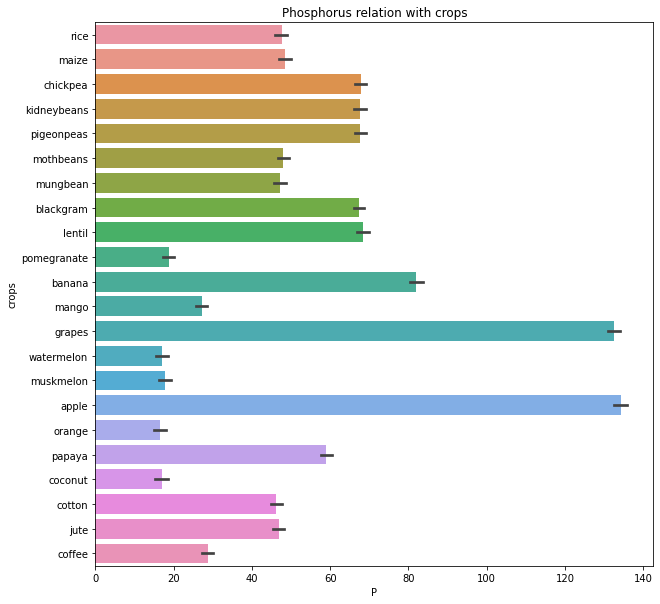

In [16]:
#VISUALIZING THE RELATION BETWEEN THE PHOSPHORUS LEVEL IN SOIL AND CROPS USING BARPLOT
plt.figure(figsize=(10,10))
plt.title("Phosphorus relation with crops")
sns.barplot(y="label", x="P", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

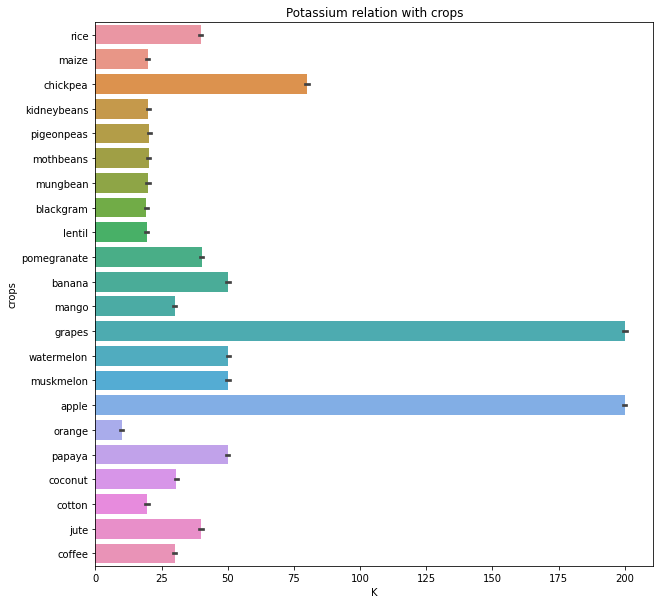

In [17]:
#VISUALIZING THE RELATION BETWEEN THE POTASSIUM LEVEL IN SOIL AND CROPS USING BARPLOT
plt.figure(figsize=(10,10))
plt.title("Potassium relation with crops")
sns.barplot(y="label", x="K", data=data)
plt.ylabel("crops")

In [18]:
avg = []
avg.append(data['temperature'].mean())
avg.append(data['humidity'].mean())
avg.append(data['rainfall'].mean())
avg.append(data['ph'].mean())
avg.append(data['N'].mean())
avg.append(data['P'].mean())
avg.append(data['K'].mean())
avg


[25.616243851779533,
 71.48177921778648,
 103.46365541576832,
 6.469480065256369,
 50.551818181818184,
 53.36272727272727,
 48.14909090909091]

([<matplotlib.patches.Wedge at 0x7f5ede8bd550>,
 [Text(1.072492145737991, 0.24445980718784846, 'TEMPERATURE'),
  Text(0.524675454331282, 0.9668069443390769, 'HUMIDITY'),
  Text(-0.9449052768220546, 0.5631642902686893, 'RAINFALL'),
  Text(-1.0024633816440784, -0.4528434259903958, 'PH'),
  Text(-0.663640997306476, -0.8772574460750198, 'NITROGEN'),
  Text(0.2843470787818867, -1.0626131651679305, 'PHOSPHORUS'),
  Text(1.0038412486051609, -0.44978077726691684, 'POTASSIUM')])

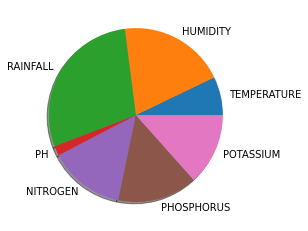

In [19]:
#REPRESENTATION OF THE AVERAGE OF FEATURES OF THE SOIL AND EXTERNAL FACTORS IN A PIE CHART
#labels = ['TEMPERATURE','HUMIDITY','RAINFALL','PH', 'NITROGEN', 'PHOSPHORUS', 'POTASSIUM']
plt.pie(avg,labels = ['TEMPERATURE','HUMIDITY','RAINFALL','PH', 'NITROGEN', 'PHOSPHORUS', 'POTASSIUM'], shadow=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

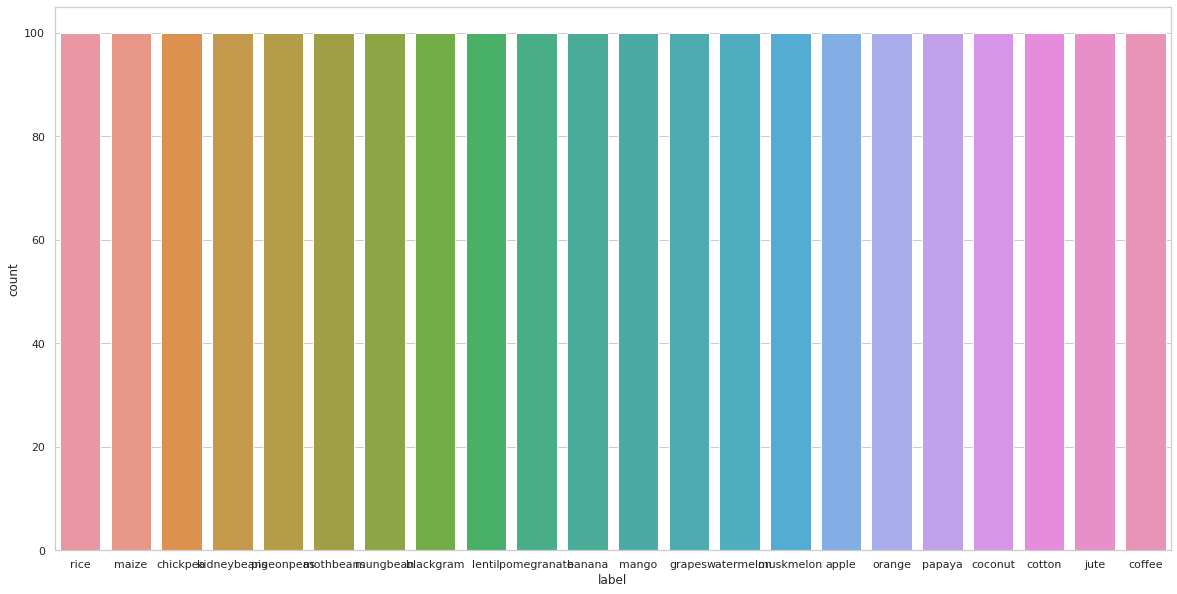

In [20]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set(style = 'whitegrid')
sns.countplot(data['label'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='temperature'>

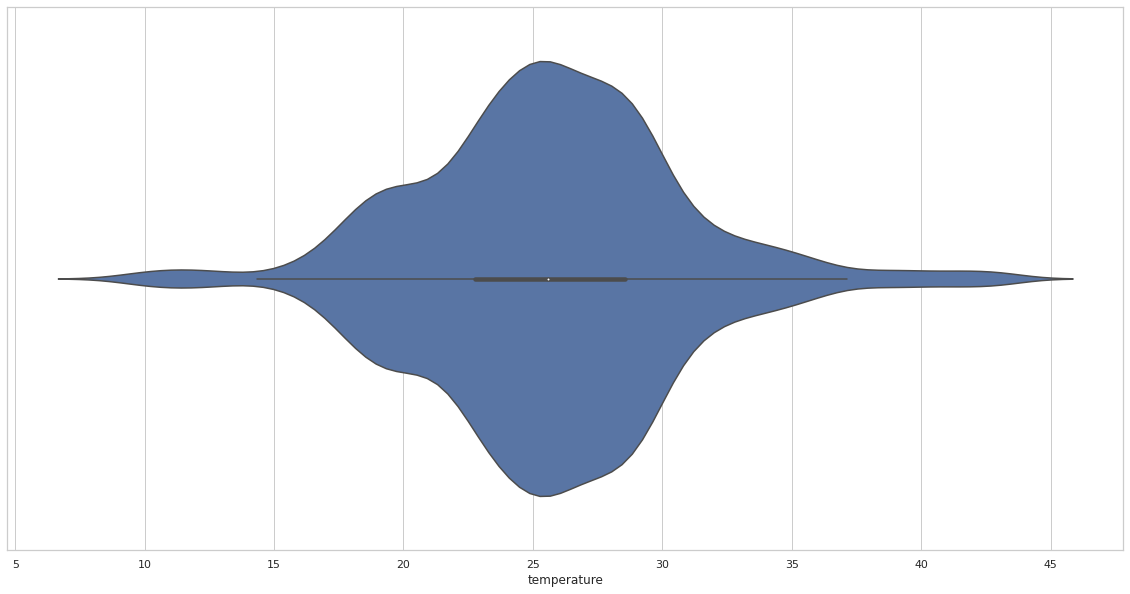

In [21]:
sns.violinplot(data['temperature'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='humidity'>

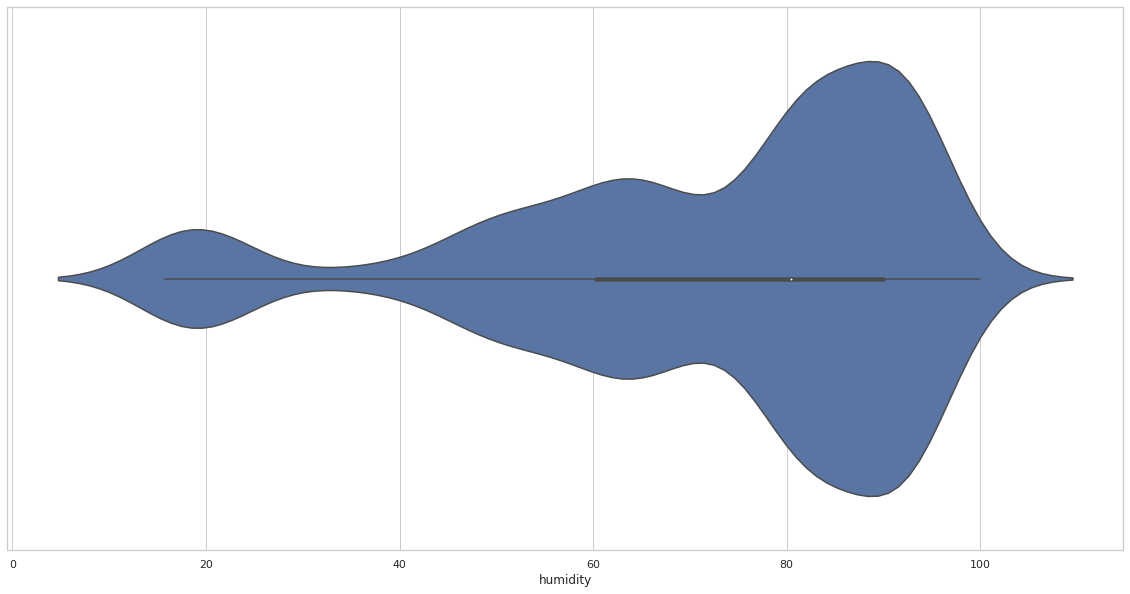

In [22]:
sns.violinplot(data['humidity'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rainfall'>

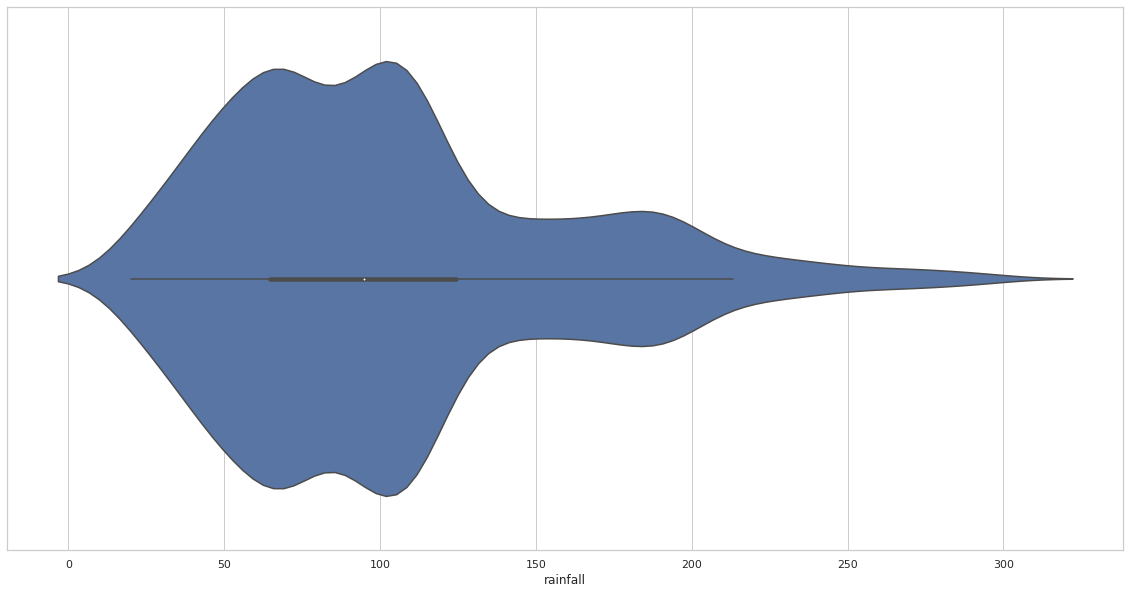

In [23]:
sns.violinplot(data['rainfall'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ph'>

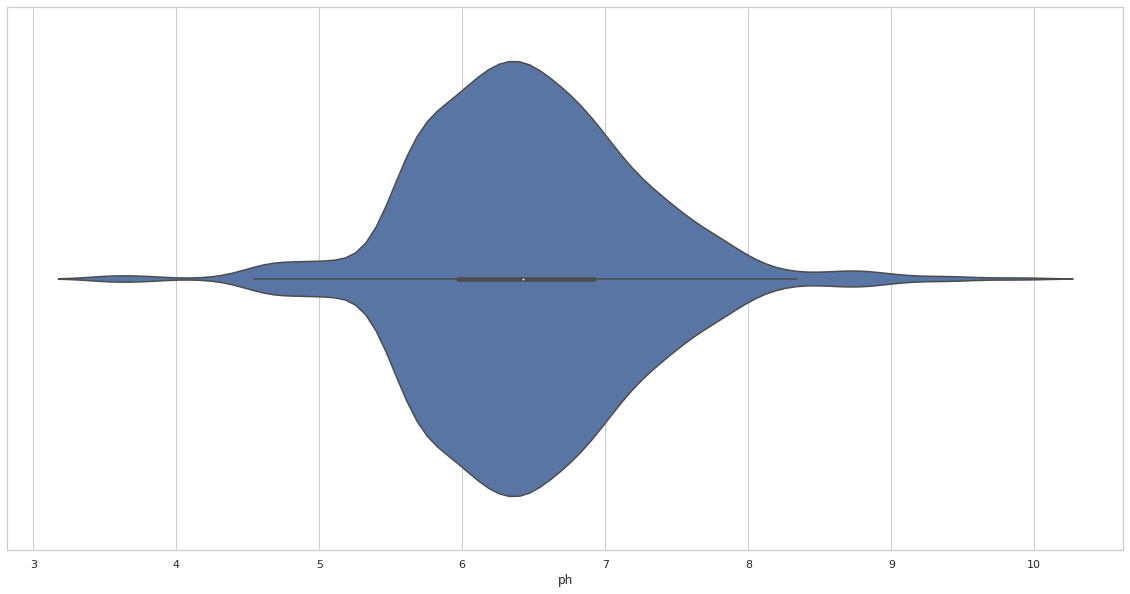

In [24]:
sns.violinplot(data['ph'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='N'>

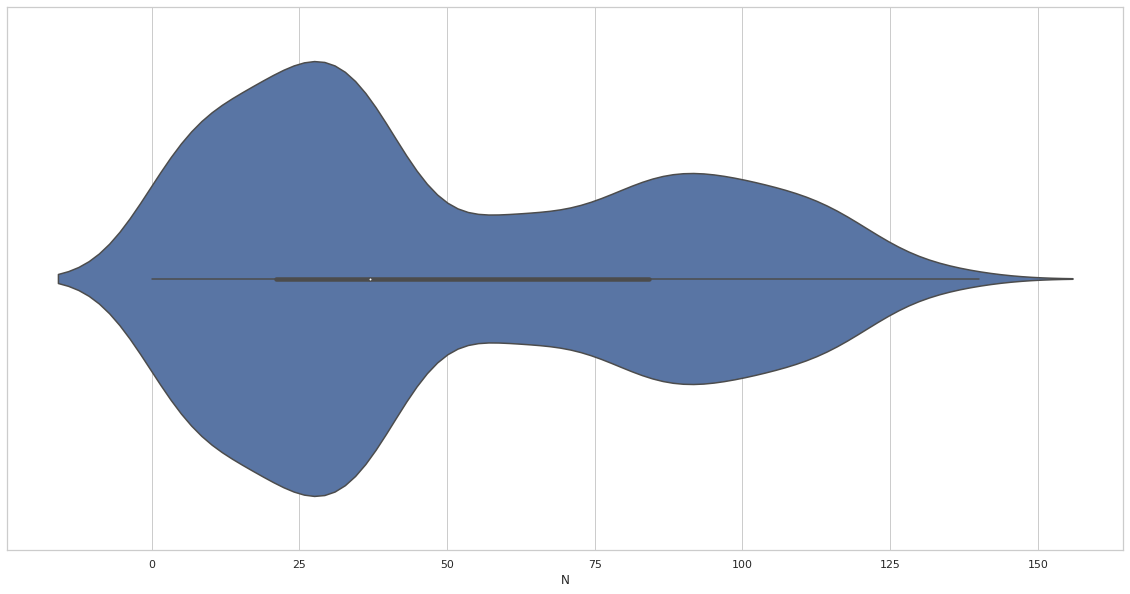

In [25]:
sns.violinplot(data['N'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='P'>

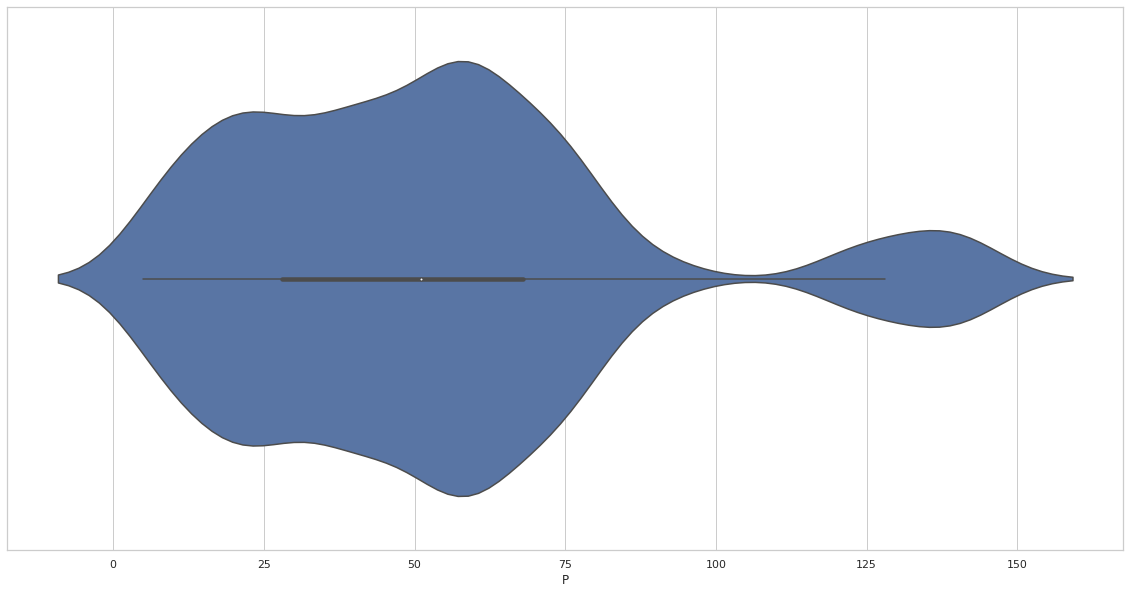

In [26]:
sns.violinplot(data['P'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='K'>

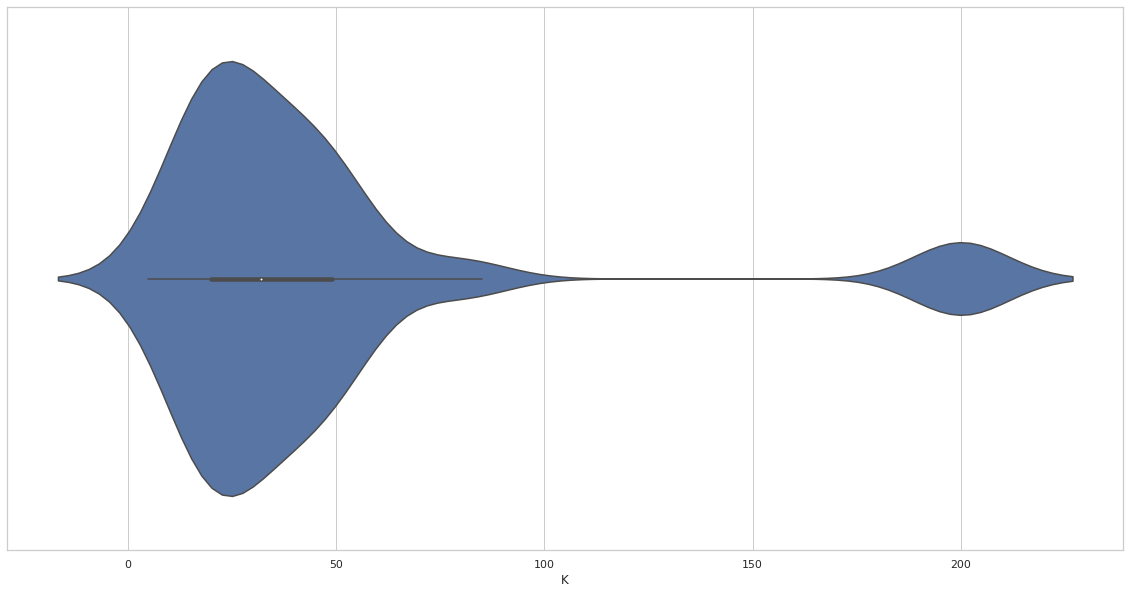

In [27]:
sns.violinplot(data['K'])